In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

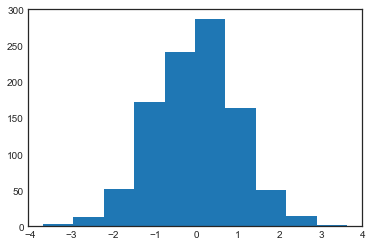

In [3]:
plt.hist(data);

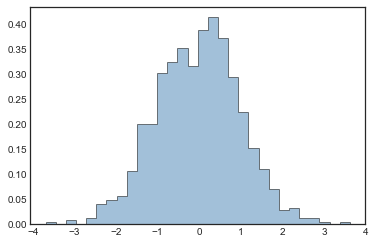

In [9]:
# more trimming
plt.hist(data, bins=30, normed=True, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='k');

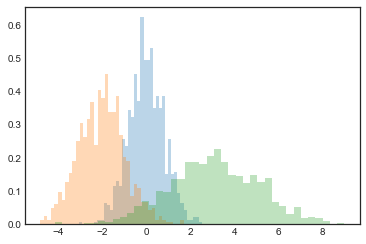

In [18]:
# example comparing histograms
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3,2,1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of
points in a given bin) and not display it, the np.histogram() function is available:

In [19]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 16 224 529 215  16]


### Two-Dimensional Histograms and Binnings

In [42]:
mean = [0,0]
cov = [[1,1], [1,2]]
x,y = np.random.multivariate_normal(mean, cov, 10000).T

#### plt.hist2d: Two-Dimensional histogram

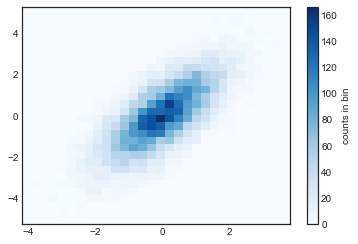

In [43]:
plt.hist2d(x,y, bins=30, cmap='Blues');
cb = plt.colorbar()
cb.set_label('counts in bin')

__there is also: `np.histogram2d` :__

In [44]:
counts,xedges,yedges = np.histogram2d(x, y,bins=30)

__and there's infact `np.histogramdd`__

#### `plt.hexbin`: Hexagonal binnings

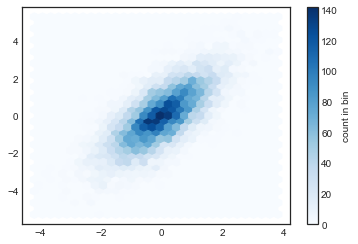

In [45]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

#### Kernel Density Estimation 
A way to smear-out the points in space and add up the result to obtain a smooth function

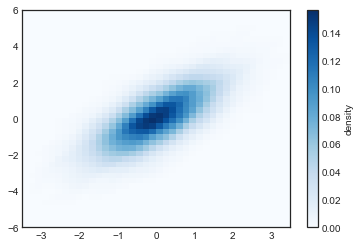

In [46]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x,y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5,3.5, 40)
ygrid = np.linspace(-6, 6,40)
Xgrid, Ygrid = np.meshgrid(xgrid,ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# plot the results as an image
plt.imshow(Z.reshape(Xgrid.shape),
          origin='lower', aspect='auto',
          extent=[-3.5,3.5, -6, 6],
          cmap='Blues')

plt.colorbar(label='density')